# Fitting Line and Polynomial Demo

### Fitting a line to a scatterplot

The basic outline of this program is the following: We want to define a line with an arbitrary, fixed slope and intercept. Once we have our line we will add randomly some normally distributed data points around the line but in a way that the line fits the noisy data reasonably well. Next, we will define an error function that takes the line and data as inputs, and finds the sum of the squares of the differences between the line and the noisy data points, and minimize this function using SciPy. In order to minimized this function we must also make an intital guess so that our SciPy function has a starting point. Lastly, we will plot the original line, the noisy data around it, and the new fitted line.

First, let's import the necessary packages for this demo.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.optimize as spo

Let's first define our error function, since we know exactly what this will look like.

In [2]:
original_line = np.array([4,2])# We will fix our slope as m = 4, and our y-intercept as b = 2, accomplished here with this array.

Next, let us chose some inputs, construct our line, and plot it.

In [3]:
original_Xvalues = np.array([x * 0.5 for x in range(0,40)])
original_Yvalues = original_line[0] * original_Xvalues + original_line[1]

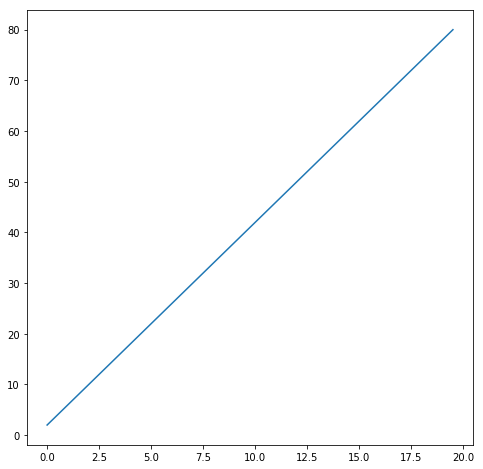

In [4]:
fig = plt.figure(figsize=(8, 8))
plt.plot(original_Xvalues, original_Yvalues)
plt.show()


Now let's add some noise and plot that as well

In [5]:
std_devs = 15
noise = np.random.normal(0, std_devs, len(original_Yvalues))
data = np.array([original_Xvalues, original_Yvalues + noise]).T

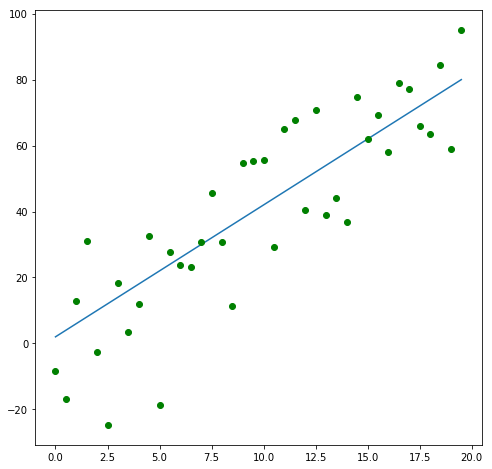

In [6]:
fig = plt.figure(figsize=(8, 8))
plt.plot(original_Xvalues, original_Yvalues, data[:,0], data[:, 1], 'go', label="Data points")
plt.show()


Now we will want to define fcns that minimize the error and fit a line to the data points by minimizing the error, respectively.

Let's start with the error function.

In [7]:
def error_function(line_var, data):
    """This function takes in a line (array with a slope and y-int), \
    and a data set (2d array with coordinates for all of the data points in our scatter plot above). And it returns single value\
    as an error term."""
    sum_of_squares_diffs = np.sum((data[:, 1] - (line_var[0] * data[:, 0] + line_var[1])) ** 2)
    return sum_of_squares_diffs

Now we must define a fcn that gives an initial guess and minimizes the error fcn.

In [8]:
def fit_line(data, error_fcn):
    "Takes in a data set(2d array with coordinates) and an error function, and returns the line(2d-array with slope and y-int)\
    that minimizes the error term."
    guess_line = np.array([0, np.mean(data[:, 1])])
    
    
    x_ends = np.float32([-5,5])
    plt.plot(x_ends, guess_line[0] * x_ends + guess_line[1], 'm--', linewidth=2.0, label='Initial guess')
    
    result = spo.minimize(error_function, guess_line, args=(data,), method='SLSQP', options={'disp': True})
    return result.x

Lastly, we should organize our data so that we can run this experiment by calling one function.

In [9]:
def run_experiment():
    # create and plot initial line.
    original_line = np.array([4,2])# We will fix our slope as m = 4, and our y-intercept as b = 2, accomplished here with this array.
    original_Xvalues = np.array([x * 0.5 for x in range(0,20)])
    original_Yvalues = original_line[0] * original_Xvalues + original_line[1] 
    fig = plt.figure(figsize=(8, 8))
    plt.plot(original_Xvalues, original_Yvalues, label = 'Original Line')
    
    # add data points around original line.
    std_devs = 10
    noise = np.random.normal(0, std_devs, len(original_Yvalues))
    data = np.array([original_Xvalues, original_Yvalues + noise]).T
    plt.plot(data[:,0], data[:, 1], 'go', label="Data points")
    
    # call function to fit data.
    l_fit = fit_line(data, error_function)
    print('Fitted line: m = {}, b = {}'.format(l_fit[0], l_fit[1]))
    plt.plot(data[:, 0], l_fit[0] * data[:,0] + l_fit[1], 'r--', linewidth=2.0, label='fitted line')
    plt.legend(['Original line', 'Data points', 'Initial Guess', 'Fitted Line'])
    plt.show()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1397.0514090133975
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: m = 3.159936078449406, b = 4.327475493706574


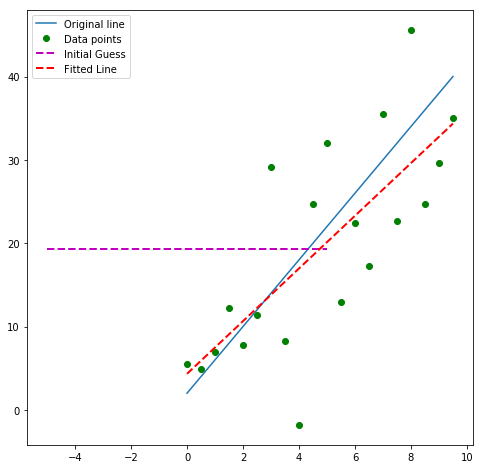

In [10]:
run_experiment()

### Fitting a Polynomial to a Scatterplot

Since the process for a polynomial is more or less the same as it is for a line, I will be brief in my commenting. I will start off by defining an error fcn I need to minimize.

In [11]:
def error_function_poly(coefs, data):#error function
    """Parameters:
    coefs: coefficients for our polynomial guess (numpy.poly1d object).
    data: 2d-array with coordinates for all of the data points in our scatter plot above
    
    Returns single value as an error term."""
    sum_of_squared_Y_diffs = np.sum((data[:,1] - np.polyval(coefs, data[:, 0])) ** 2)
    return sum_of_squared_Y_diffs

In [12]:
def fit_poly(data, error_func, degree=3):
    """Fit a line to given data, using a supplied error fcn.
    data: 2d array where each row is a point(X, Y)
    error_func: function that computes the error between a polynomial and observed data

    Returns polynomial that minimizes the error fcn.
    """

    # Generate initial guess for polynomoial
    C_guess = np.poly1d(np.ones(degree+1,dtype=np.float32)) # m=0,b=mean(y_values)
    print('\n',"C_guess:",C_guess)

    # plot initial guess (optional)
    x = np.linspace(-2, 5, 21)
    plt.plot(x, np.polyval(C_guess, x), 'm--', linewidth=2.0, label="Initial guess")

    # Call optimizer to minimize error fcn
    result=spo.minimize(error_func, C_guess, args=(data,), method='SLSQP', options={'disp': True})
    return np.poly1d(result.x)



In [13]:
def run_poly_experiment():
    # Define original polynomial with array of coefficients
    p_orig = np.float32([2,3,-2,4])
    Xorig = np.linspace(-5, 5, 21)
    Yorig = np.poly1d(p_orig)(Xorig)
    print('Original Line:', np.poly1d(p_orig))
    fig = plt.figure(figsize=(10,10))
    plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label="Original line")

    # Generate noisy data points
    noise_sigma =40.0
    noise = np.random.normal(0, noise_sigma, Yorig.shape)
    data = np.asarray([Xorig, Yorig + noise]).T
    plt.plot(data[:,0], data[:, 1], 'go', label="Data points")

    # Try to fit a line to this data
    p_fit = fit_poly(data, error_function_poly)
    print('pfit:{}'.format(p_fit))
    print('Fitted line: C0 = {}, C1 = {}'.format(l_fit[0], l_fit[1]))
    plt.plot(data[:, 0],p_fit(data[:,0]), 'r--', linewidth=2.0, label='fitted line')
    plt.legend(['Original line', 'Data points', 'Initial Guess', 'Fitted Line'])
    plt.show()

Original Line:    3     2
2 x + 3 x - 2 x + 4

 C_guess:    3     2
1 x + 1 x + 1 x + 1
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 14817.45368612892
            Iterations: 6
            Function evaluations: 50
            Gradient evaluations: 6
pfit:       3         2
1.662 x + 2.398 x + 1.359 x + 19.28


NameError: name 'l_fit' is not defined

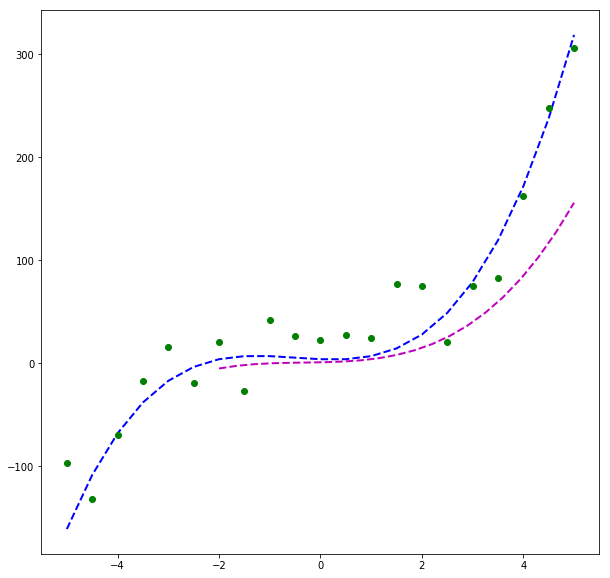

In [14]:
run_poly_experiment()